In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import  ElasticNet
from sklearn.linear_model import  Ridge
from sklearn.model_selection import cross_val_score
import  statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import  Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib
from sklearn.decomposition import  PCA
from sklearn.cluster import  KMeans

%matplotlib inline

In [2]:
#importing data to train

df=pd.read_csv('housing.csv/housing.csv')

print('Number of Rows and colums are '+str(df.shape))

print('\n The Attributes are - \n')
[print(i,end='.\t\n') for i in df.columns.values]

Number of Rows and colums are (20640, 10)

 The Attributes are - 

longitude.	
latitude.	
housing_median_age.	
total_rooms.	
total_bedrooms.	
population.	
households.	
median_income.	
ocean_proximity.	
median_house_value.	


[None, None, None, None, None, None, None, None, None, None]

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


### Missing values and how to fill them 

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

We can see that total_bedrooms has 207 missing values and average value for total_bedrooms is 537 from below

In [22]:
df['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

Text(0, 0.5, 'frequency')

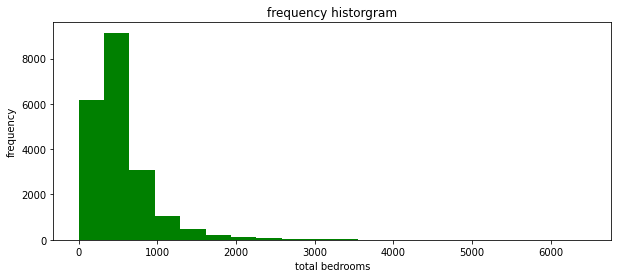

In [4]:
#histogram of totalbedrooms

plt.figure(figsize=(10,4))
plt.hist(df[df['total_bedrooms'].notnull()]['total_bedrooms'],bins=20,color='green')
(df['total_bedrooms']>4000).sum()
plt.title('frequency historgram')
plt.xlabel('total bedrooms')
plt.ylabel('frequency')

we can see that there are many outliers so we cant replace missing values with mean
so we will use median to fill missing values

In [6]:
#function to fill the missing values of total_bedrooms based upon categories of ocean_proximity
def calculate_median(x):
    unique_colums_ocean_proximity=x['ocean_proximity'].unique()
    for i in unique_colums_ocean_proximity:
        median=x[x['ocean_proximity']==i]['total_bedrooms'].median()
        x.loc[x['ocean_proximity']==i,'total_bedrooms'] =  x[x['ocean_proximity']==i]['total_bedrooms'].fillna(median)
calculate_median(df)

In [7]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

## Finding outliers and handling them

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


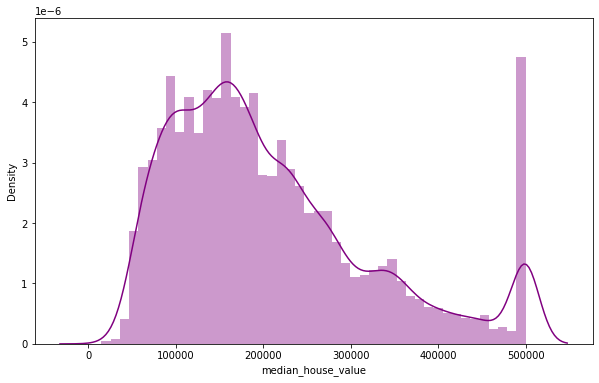

[]

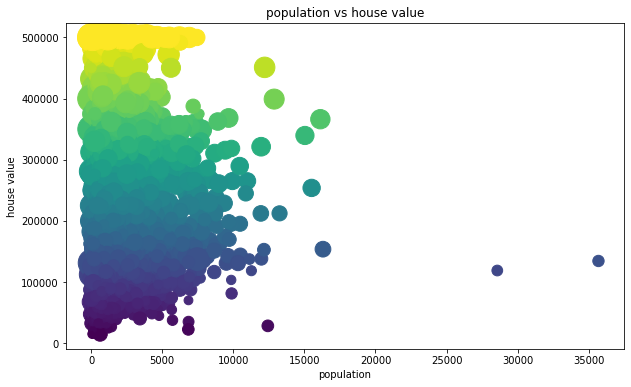

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(df['median_house_value'],color='purple')
plt.show()

plt.figure(figsize=(10,6))

plt.scatter(df['population'],df['median_house_value'],c=df['median_house_value'],s=df['median_income']*50)
plt.colorbar
plt.title('population vs house value' )
plt.xlabel('population')
plt.ylabel('house value')
plt.plot()

In [9]:
#removing outliers

df[df['median_house_value']>450000]['median_house_value'].value_counts().head()
df=df.loc[df['median_house_value']<500001,:]
df=df[df['population']<25000]

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


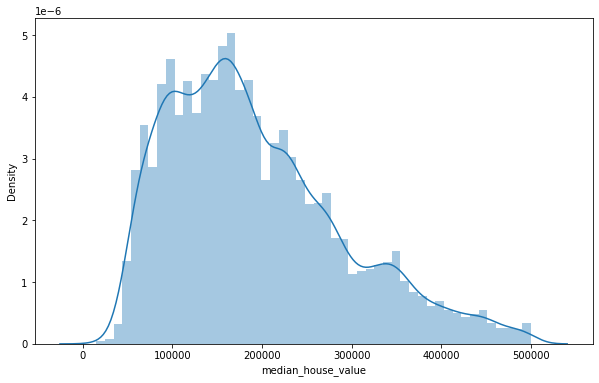

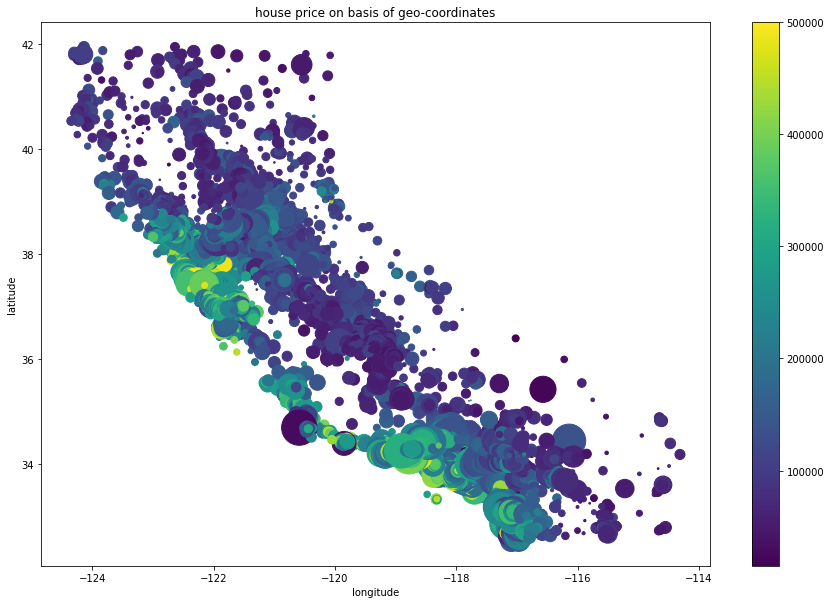

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(df['median_house_value'])
plt.show()

plt.figure(figsize=(15,10))
plt.scatter(df['longitude'],df['latitude'],c=df['median_house_value'],s=df['population']/10,cmap='viridis')
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('house price on basis of geo-coordinates')
plt.show()

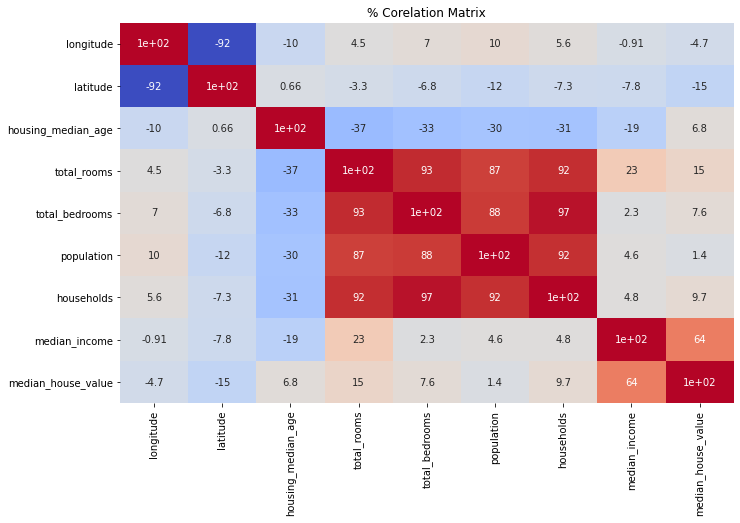

In [10]:
#corelation matrix
plt.figure(figsize=(11,7))
sns.heatmap(cbar=False,annot=True,data=df.corr()*100,cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.show()

# Data preprocessing

In [14]:
# converting ocean_proximity to dummies

df=pd.concat([pd.get_dummies(df['ocean_proximity'],drop_first=True),df],axis=1).drop('ocean_proximity',axis=1)
df['income per working population']=df['median_income']/(df['population']-df['households'])
df['bed per house']=df['total_bedrooms']/df['total_rooms']
df['h/p']=df['households']/df['population']

In [15]:
def type_of_building_detector(x):
    if x<=10:
        return "new"
    elif x<=30:
        return 'mid old'
    else:
        return 'old'
df=pd.concat([df,pd.get_dummies(df['housing_median_age'].apply(type_of_building_detector),drop_first=True)],axis=1)

x=df.drop('median_house_value',axis=1).values
y=df['median_house_value'].values

## Spliting data in train set and test set and normalising data

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
xtrain=ms.fit_transform(xtrain)
xtest=ms.transform(xtest)

# fitting data into the model / Modeling

Linear regression with most co related features
The cross validated accuracy  - 41.3506511798424
The corss validated variance is - 1.9235500099556033
root mean squared error for test data   is 76318.44298565741


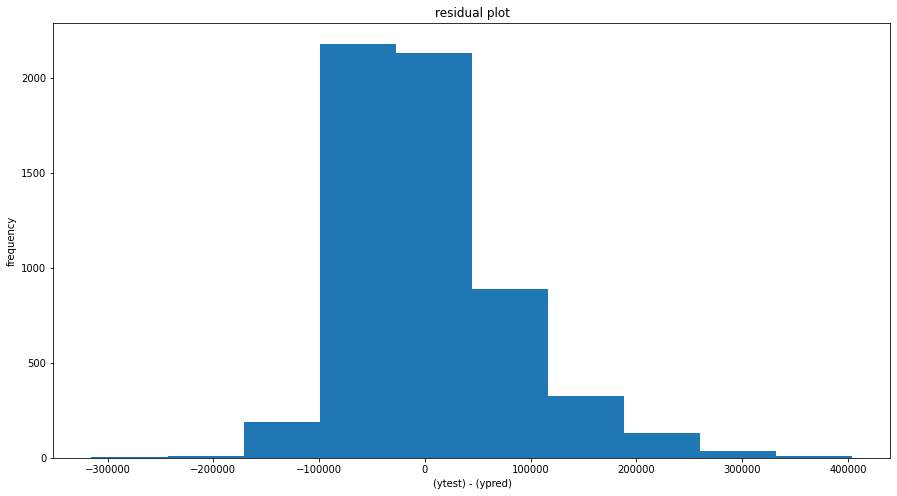

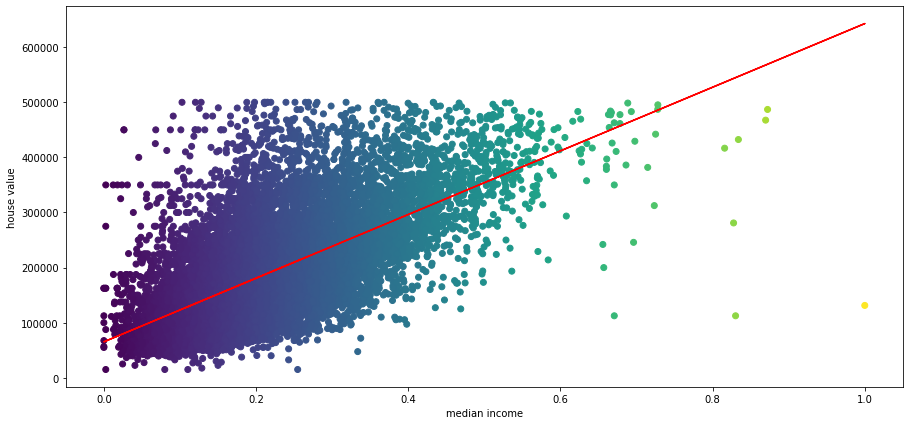

In [17]:
def regresssor_model(x,y,estimator):
   
    regressor=estimator()
    regressor.fit(x,y)
    lr_rmse=np.sqrt(mean_squared_error(y,regressor.predict(x)))
    cv_regressor=cross_val_score(cv=10,X=x,y=y,estimator=regressor,scoring='r2')
    print('The cross validated accuracy  - '+str(100*cv_regressor.mean()))
    print('The corss validated variance is - '+str(100*cv_regressor.std()))
    return regressor

def evaluate(ypred,ytest,regressor):
    plt.figure(figsize=(15,8))
    plt.xlabel('(ytest) - (ypred)')
    plt.ylabel('frequency')
    plt.title('residual plot')
    plt.hist(ytest-ypred)
    print("root mean squared error for test data   is "+str(np.sqrt(mean_squared_error(ytest,ypred))))
    plt.show()
    
print('Linear regression with most co related features')
l=regresssor_model(xtrain[:,[11]],ytrain,LinearRegression)
evaluate(l.predict(xtest[:,[11]]),ytest,l)
plt.figure(figsize=(15,7))
plt.scatter(xtrain[:,11],ytrain,c=xtrain[:,11])
plt.plot(xtrain[:,11],l.predict(xtrain[:,11:12]),color='red')
plt.xlabel('median income')
plt.ylabel('house value')
plt.show()    

In [18]:
l.predict(xtest[:,[11]])

array([301168.66635623, 166226.52795323, 122383.77739195, ...,
       165668.83350669, 244933.14848656, 147639.36875652])

In [23]:
predicted_values = l.predict(xtest[:,[11]])
for i in range(len(predicted_values)):
    print("Actual value : {}  and predicted value is: {}".format(ytest[i],round(predicted_values[i],2)))

Actual value : 310900  and predicted value is: 301168.67
Actual value : 150500  and predicted value is: 166226.53
Actual value : 68600  and predicted value is: 122383.78
Actual value : 306700  and predicted value is: 350018.72
Actual value : 184200  and predicted value is: 214180.28
Actual value : 146800  and predicted value is: 184973.03
Actual value : 70400  and predicted value is: 143026.44
Actual value : 128400  and predicted value is: 229018.94
Actual value : 52600  and predicted value is: 103485.9
Actual value : 225000  and predicted value is: 183554.89
Actual value : 229400  and predicted value is: 206049.89
Actual value : 309900  and predicted value is: 355607.61
Actual value : 257200  and predicted value is: 211571.07
Actual value : 159400  and predicted value is: 214323.69
Actual value : 181800  and predicted value is: 144731.39
Actual value : 171400  and predicted value is: 205504.15
Actual value : 112000  and predicted value is: 164840.26
Actual value : 348500  and predicte

Actual value : 281200  and predicted value is: 260090.49
Actual value : 156800  and predicted value is: 139389.47
Actual value : 283200  and predicted value is: 208599.36
Actual value : 205500  and predicted value is: 176392.5
Actual value : 123400  and predicted value is: 137628.75
Actual value : 236100  and predicted value is: 243088.77
Actual value : 356100  and predicted value is: 232289.42
Actual value : 179400  and predicted value is: 223995.71
Actual value : 88400  and predicted value is: 108795.95
Actual value : 275000  and predicted value is: 160928.43
Actual value : 241100  and predicted value is: 224975.65
Actual value : 67500  and predicted value is: 186180.04
Actual value : 162300  and predicted value is: 248884.81
Actual value : 170600  and predicted value is: 261245.71
Actual value : 250000  and predicted value is: 130139.71
Actual value : 74600  and predicted value is: 151925.65
Actual value : 450000  and predicted value is: 203568.15
Actual value : 218800  and predicte

Actual value : 227200  and predicted value is: 166222.54
Actual value : 298300  and predicted value is: 231608.23
Actual value : 61500  and predicted value is: 165393.97
Actual value : 170700  and predicted value is: 219398.71
Actual value : 74800  and predicted value is: 146316.84
Actual value : 225000  and predicted value is: 98574.21
Actual value : 128800  and predicted value is: 209415.98
Actual value : 142300  and predicted value is: 165055.37
Actual value : 271400  and predicted value is: 146914.37
Actual value : 118800  and predicted value is: 91395.88
Actual value : 289900  and predicted value is: 233882.83
Actual value : 85000  and predicted value is: 162171.29
Actual value : 341300  and predicted value is: 315644.82
Actual value : 217700  and predicted value is: 259843.51
Actual value : 336200  and predicted value is: 221689.24
Actual value : 160500  and predicted value is: 211061.18
Actual value : 496400  and predicted value is: 308127.9
Actual value : 111200  and predicted 

Actual value : 200000  and predicted value is: 167576.95
Actual value : 108300  and predicted value is: 208296.61
Actual value : 244300  and predicted value is: 213686.33
Actual value : 118900  and predicted value is: 156128.27
Actual value : 138800  and predicted value is: 185212.04
Actual value : 117700  and predicted value is: 145217.38
Actual value : 84500  and predicted value is: 136851.96
Actual value : 220700  and predicted value is: 198385.58
Actual value : 167100  and predicted value is: 193728.83
Actual value : 287900  and predicted value is: 232950.68
Actual value : 493000  and predicted value is: 487988.34
Actual value : 80000  and predicted value is: 172663.92
Actual value : 119600  and predicted value is: 150495.56
Actual value : 141500  and predicted value is: 204675.58
Actual value : 410400  and predicted value is: 333817.69
Actual value : 89400  and predicted value is: 108740.18
Actual value : 269700  and predicted value is: 273614.58
Actual value : 49800  and predicte

Actual value : 289300  and predicted value is: 233038.32
Actual value : 334500  and predicted value is: 321480.69
Actual value : 87800  and predicted value is: 146790.88
Actual value : 264200  and predicted value is: 276008.68
Actual value : 100000  and predicted value is: 170150.31
Actual value : 67500  and predicted value is: 96729.83
Actual value : 239300  and predicted value is: 130864.72
Actual value : 140200  and predicted value is: 114619.87
Actual value : 92800  and predicted value is: 189645.71
Actual value : 238600  and predicted value is: 184897.34
Actual value : 162000  and predicted value is: 132318.71
Actual value : 93000  and predicted value is: 157646.0
Actual value : 108900  and predicted value is: 149627.15
Actual value : 219500  and predicted value is: 257258.2
Actual value : 161100  and predicted value is: 237041.77
Actual value : 55000  and predicted value is: 80899.28
Actual value : 166300  and predicted value is: 197206.45
Actual value : 76600  and predicted valu

Actual value : 219500  and predicted value is: 247375.05
Actual value : 131900  and predicted value is: 151861.91
Actual value : 173300  and predicted value is: 231488.73
Actual value : 133600  and predicted value is: 111727.83
Actual value : 100000  and predicted value is: 189239.39
Actual value : 63400  and predicted value is: 127494.65
Actual value : 187300  and predicted value is: 185554.62
Actual value : 410000  and predicted value is: 199696.16
Actual value : 148500  and predicted value is: 150467.68
Actual value : 243800  and predicted value is: 167230.38
Actual value : 312400  and predicted value is: 215992.79
Actual value : 64500  and predicted value is: 135202.78
Actual value : 292600  and predicted value is: 194406.03
Actual value : 92600  and predicted value is: 127849.18
Actual value : 105400  and predicted value is: 139277.94
Actual value : 261500  and predicted value is: 189115.9
Actual value : 160800  and predicted value is: 104183.02
Actual value : 74900  and predicted